In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [29]:

pattern = 'SuperScan (HAADF) *_data2.csv'
sheets = glob.glob(pattern)
sheets

['SuperScan (HAADF) 38_data2.csv',
 'SuperScan (HAADF) 49_data2.csv',
 'SuperScan (HAADF) 44_data2.csv',
 'SuperScan (HAADF) 45_data2.csv',
 'SuperScan (HAADF) 41_data2.csv',
 'SuperScan (HAADF) 42_data2.csv',
 'SuperScan (HAADF) 47_data2.csv',
 'SuperScan (HAADF) 48_data2.csv']

Remove data from image 44. There is vacuum in this image which required a different threshold than the rest. Best to omit it so the processing is exactly the same for every image.

In [30]:
del sheets[2]
sheets

['SuperScan (HAADF) 38_data2.csv',
 'SuperScan (HAADF) 49_data2.csv',
 'SuperScan (HAADF) 45_data2.csv',
 'SuperScan (HAADF) 41_data2.csv',
 'SuperScan (HAADF) 42_data2.csv',
 'SuperScan (HAADF) 47_data2.csv',
 'SuperScan (HAADF) 48_data2.csv']

In [31]:
df = pd.concat([pd.read_csv(f) for f in sheets]) 
df

,name,area
0,SuperScan (HAADF) 38,1.0
1,SuperScan (HAADF) 38,2.5
2,SuperScan (HAADF) 38,3.5
3,SuperScan (HAADF) 38,3.0
4,SuperScan (HAADF) 38,8.5
...,...,...
3222,SuperScan (HAADF) 48,3.0
3223,SuperScan (HAADF) 48,18.0
3224,SuperScan (HAADF) 48,15.5
3225,SuperScan (HAADF) 48,12.5


In [32]:
df['Diameter'] =  2 * np.sqrt(df['area'] / np.pi)
df

,name,area,Diameter
0,SuperScan (HAADF) 38,1.0,1.128379
1,SuperScan (HAADF) 38,2.5,1.784124
2,SuperScan (HAADF) 38,3.5,2.111004
3,SuperScan (HAADF) 38,3.0,1.954410
4,SuperScan (HAADF) 38,8.5,3.289762
...,...,...,...
3222,SuperScan (HAADF) 48,3.0,1.954410
3223,SuperScan (HAADF) 48,18.0,4.787307
3224,SuperScan (HAADF) 48,15.5,4.442433
3225,SuperScan (HAADF) 48,12.5,3.989423


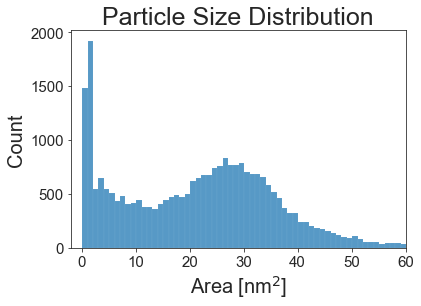

In [33]:
#sns.set_style('darkgrid')
sns.histplot(df['area'], kde=False, binwidth=1)
plt.title('Particle Size Distribution', fontsize=25)
plt.xlabel('Area [nm$^2$]', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlim(-2,60)
plt.tick_params(labelsize=15)
savename = 'combined_data.svg'
plt.savefig(savename, bbox_inches='tight')
plt.show()

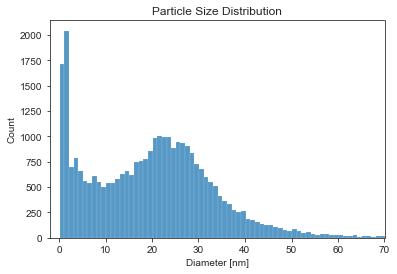

In [24]:
#sns.set_style('darkgrid')
sns.histplot(df['area'], kde=False, binwidth=1)
plt.title('Particle Size Distribution')
plt.xlabel('Diameter [nm]')
#plt.ylabel('Count')
plt.xlim(-2,70)
plt.show()

In [34]:
dens = df['name'].value_counts()/(1.024*1.024)

In [35]:
dens[-1] = dens[-1]*((1.024*1.024)/(0.512*0.512))
dens

SuperScan (HAADF) 38    5222.320557
SuperScan (HAADF) 42    4600.524902
SuperScan (HAADF) 45    4354.476929
SuperScan (HAADF) 49    3426.551819
SuperScan (HAADF) 48    3077.507019
SuperScan (HAADF) 47    2966.880798
SuperScan (HAADF) 41    8049.011230
Name: name, dtype: float64

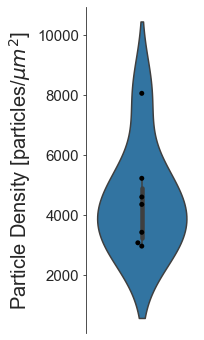

In [39]:
sns.set_style('ticks')
fig = plt.figure(figsize=(2, 6))
sns.violinplot(data=dens)
sns.swarmplot(data = dens, color='black')
plt.ylabel('Particle Density [particles/$\mu m^2$]', fontsize=20)
sns.despine(bottom=True) 
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.tick_params(axis='y', labelsize=15)
plt.savefig('Density_distribution.svg', bbox_inches='tight')
plt.show()

In [56]:
df.describe()

,area
count,30805.000000
mean,20.010481
std,13.873358
min,0.125000
25%,8.500000
50%,20.500000
75%,28.500000
max,257.500000
